#### Fait  par : 
  #### Mohamed Akli Rabia  & Samuel Kaci & Ali Abed Alsater



# Modèle linéaire à effets mixtes

Nous allons dans ce projet nous intéresser à une variante des modèles linéaires, le modèle linéaire à effets mixtes.
Ce modèle est composé d’une partie fixe et d’une partie aléatoire. La partie fixe est identique pour chaque individu et représente l’effet de la population en général.
La partie aléatoire est propre à chacun des individus et traduit la variabilité liée à chaque sujet.

## Description des données

Nous allons travailler sur le jeu de données "politness" qui regroupe plusieurs données décrivant le ton de la voix (enregistrées en fréquences) afin de faire un lien avec la politesse. 
L'expérience est faite sur plusieurs sujets, ou ils devaient parler avec différents tons selon plusieurs scénarios.

On compte des scénarios formels nécessitant de la politesse et d'autres non.
Le ton de la voix est mesuré à chaque fois, on note le sexe de chaque sujet aussi, car il peut être influent sur la voix. 

## Objectif

Le but est donc d'expliquer la variable "frequency" qui représente le ton de la voix avec les variables "sexe" et "attitude" cette dernière représente la politesse

## Aperçu des données 

Nous commençons par importer les données "politness", et charger les librairies standards dont nous avons besoin.  

In [1]:
## lecture des données
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#data = pd.read_csv("http://www.bodowinter.com/tutorial/politeness_data.csv") Le lien ne marche plus
data = pd.read_csv('https://qubeshub.org/qubesresources/publications/901/serve/1/2691?el=1&download=1')
data.head()

,subject,gender,scenario,attitude,frequency
0,F1,F,1,pol,213.3
1,F1,F,1,inf,204.5
2,F1,F,2,pol,285.1
3,F1,F,2,inf,259.7
4,F1,F,3,pol,203.9


In [2]:
?data

Nous pouvons voir que le plan est équilibré.

In [3]:
data.subject.value_counts()

M7    14
F3    14
F2    14
M4    14
M3    14
F1    14
Name: subject, dtype: int64

In [4]:
pd.crosstab(data.subject, data.attitude)

attitude,inf,pol
subject,,
F1,7,7
F2,7,7
F3,7,7
M3,7,7
M4,7,7
M7,7,7


Boxplot qui exprime la variation de la fréquence par rapport aux deux modalités "inf" et "pol" de chaque sujet.

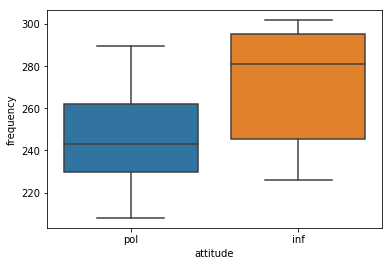

In [5]:
import seaborn as sns
boxplot = sns.boxplot(x=data.attitude[data.subject=='F2'],y=data.frequency[data.subject=='F2'])


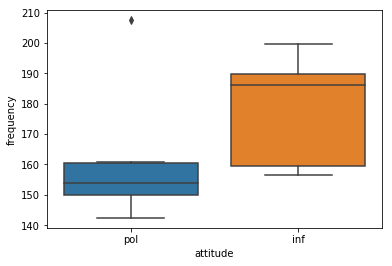

In [6]:
boxplot = sns.boxplot(x=data.attitude[data.subject=='M3'],y=data.frequency[data.subject=='M3'])


Moyenne des fréquences par sujet.

In [7]:
x=data.groupby('subject')['frequency'].mean()
print(x)

subject
F1    232.035714
F2    258.185714
F3    250.735714
M3    168.978571
M4    145.976923
M7    102.178571
Name: frequency, dtype: float64


Affichage des modalités "pol" et "inf".

In [8]:
data[data.attitude == "pol" ].head()

,subject,gender,scenario,attitude,frequency
0,F1,F,1,pol,213.3
2,F1,F,2,pol,285.1
4,F1,F,3,pol,203.9
6,F1,F,4,pol,250.8
8,F1,F,5,pol,231.9


In [9]:
data[data.attitude == "inf" ].head()

,subject,gender,scenario,attitude,frequency
1,F1,F,1,inf,204.5
3,F1,F,2,inf,259.7
5,F1,F,3,inf,286.9
7,F1,F,4,inf,276.8
9,F1,F,5,inf,252.4


Nous allons afficher un graphique de nos données, pour voir l'allure qu'elles ont.

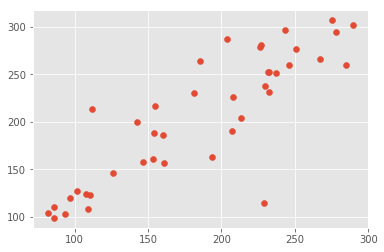

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(data.frequency[data.attitude == "pol" ], data.frequency[data.attitude=="inf"])

plt.show()

À l'oeil nu, le nuage paraît linéaire, nous remarquons aussi un individu qui se démarque du groupe, il se peut qu'il soit atypique.

Nous allons voir ici un aperçu des moyennes des fréquences de la voix par groupe.

In [11]:
data.groupby('subject')['frequency'].mean()

subject
F1    232.035714
F2    258.185714
F3    250.735714
M3    168.978571
M4    145.976923
M7    102.178571
Name: frequency, dtype: float64

## Modèle 1

Nous allons construire le modèle de régression mixte d'abord en s'appuyant sur l'effet aléatoire de la constante, on suppose que le ton moyen est différent pour chaque individu, on utilise la fonction "mixedlm" contenue dans "statmodels". 
Pour ce faire, nous devons obligatoirement supprimer la ligne 38 qui contient une donnée manquante.

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
## Supprimé la valeur manquante
A =data.dropna()
md = smf.mixedlm("frequency ~ 1", A, groups=A["subject"])
mdf = md.fit()
print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: frequency
No. Observations: 83      Method:             REML     
No. Groups:       6       Scale:              941.2110 
Min. group size:  13      Likelihood:         -409.4981
Max. group size:  14      Converged:          Yes      
Mean group size:  13.8                                 
-------------------------------------------------------
           Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept  193.025   25.913 7.449 0.000 142.236 243.815
Group Var 3960.949   85.703                            



Les résultats sont contenus dans l'objet " mdf ", nous pouvons voir les valeurs de l'intercepte de chaque sujet dans " mdf.fittedvalues "   

In [13]:
pd.crosstab(mdf.fittedvalues, A.subject)


subject,F1,F2,F3,M3,M4,M7
row_0,,,,,,
103.694781,0,0,0,0,0,14
146.821466,0,0,0,0,13,0
169.379905,0,0,0,14,0,0
231.384639,14,0,0,0,0,0
249.772540,0,0,14,0,0,0
257.098202,0,14,0,0,0,0


L'estimation de la constante est donnée par la moyenne sur la variable à expliquer qui est "frequency" et l'estimation de la déviance est donnée son écart type. 

In [14]:
# estimation d'intercept
np.mean(A.frequency)

193.58192771084342

In [15]:
#estimation de la déviance
np.std(A.frequency)

65.14466042452061

## Modèle 2

Nous allons maintenant inclure les effets fixes dans le modèle, nous allons tenir compte du sexe et des effets aléatoires. 
Le modèle est $$ frequecy = intercept + intercept_j + attitude + sexe $$


Nous devons d'abord transformé les variables "sexe" et "attitude" en variables numériques, codées en -1, 1. (femme=1 , homme=-1), (pol=-1, inf=1), afin d'avoir la somme des deux modalités de chaque variable est égale à 0.

Pour cette partie nous avons utilisé de nombreuses méthodes, qui se sont toutes retrouvées très peu fructueuses.
Nous allons vous en présenter quelques-unes dans cette partie.

Afin de pouvoir continuer le Tp nous avons fait le choix de créer un nouveau data a format csv de la forme souhaité.

### Esemble de nos essais 

Nous avons commencé par utilisé la fonction "factorize" contenue dans pandas, mais elle transforme la variable en 0,1. Ce qui ne nous arrange pas.

In [16]:
pd.factorize(A.gender)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 Index(['F', 'M'], dtype='object'))

Puis nous avons essayé de le faire à la main avec une boucle for.

In [17]:
B = np.copy(A)

for i in range(0, A.shape[0]):
    if data['gender'][i] == 'F':
        B[i][1] = 1
    else:
        B[i][1] = - 1
    
    if data['attitude'][i] == 'inf':
        B[i][3] = 1
    else:
        B[i][3] = -1
        

In [18]:
type(B)

numpy.ndarray

Ici nous pouvons voir que le type de B n'est pas le même que A, nous allons donc le convertir

In [19]:
B = pd.DataFrame(B)

In [20]:
B.head()

,0,1,2,3,4
0,F1,1,1,-1,213.3
1,F1,1,1,1,204.5
2,F1,1,2,-1,285.1
3,F1,1,2,1,259.7
4,F1,1,3,-1,203.9


Ici nous remarquons que nous avons perdu le nom des colonnes.

In [21]:
import pandas as pd
B.columns = ['subject', 'gender', 'scenario', 'attitude', 'frequency']

In [22]:
print(type(B))

<class 'pandas.core.frame.DataFrame'>


In [23]:
print(B.head())

  subject gender scenario attitude frequency
0      F1      1        1       -1     213.3
1      F1      1        1        1     204.5
2      F1      1        2       -1     285.1
3      F1      1        2        1     259.7
4      F1      1        3       -1     203.9


À cette étape B est devenu une copie parfaite de A, avec les variables "gender" et "attitude" recoder en -1 et 1.
Mais malgré cela il nous est impossible d'utiliser la matrice B avec les fonctions dont nous avons besoin.

Nous avons donc intégré le jeu de données suivant ayant la transformation voulue.

In [24]:
A2=pd.read_csv("data.csv")

In [25]:
## Modèle 2
md2 = smf.mixedlm("frequency ~ attitude + gender", A2, groups=A2["subject"])
mdf2 = md2.fit()
mdf2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: frequency
No. Observations: 83      Method:             REML     
No. Groups:       6       Scale:              850.9501 
Min. group size:  13      Likelihood:         -394.7583
Max. group size:  14      Converged:          Yes      
Mean group size:  13.8                                 
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 192.883   10.531 18.315 0.000 172.242 213.524
attitude    9.705    3.203  3.030 0.002   3.426  15.983
gender     54.102   10.531  5.137 0.000  33.462  74.743
Group Var 603.873   16.530                             
=======================================================

"""

## Évaluation du modèle
Pour évaluer la qualité d'un modèle, ou faire des comparaisons avec d'autres modèles, le critère AIC est souvent utilisé. Ce critère doit être minimisé, c'est-à-dire que l'on choisit le modèle ayant le AIC le plus faible.
$$ AIC = déviance + 2*(P+1)$$ 
$$ déviance = -2 * logvraissemblance $$
P est le nombre de paramètres dans le modèle.

Afin de calculer la déviance, il nous faut la log-vraisemblance, elle est contenue dans l'objet "mdf2.llf", nous allons donc calculer l'AIC du modèle 2 en appliquant la formule définie précédemment. Notons ici que "P" est égal à 4, nous comptons 3 paramètres fixes et 1 aléatoire.

In [26]:
# D'abord la déviance
dev = -2*mdf2.llf
print(dev)

789.5165130342868


In [27]:
# AIC
# p = 4 
AIC = dev + 2 * (4 + 1) 
print(AIC)

799.5165130342868


Nous allons essayer de retrouver le résultat avec la fonction AIC contenue dans "RegscorePy". 
Pour cela il nous faut la variable à prédire, c'est-à-dire $y=frequency$ et les valeurs ajustées $\hat{y}$ qui sont contenues dans l'objet "mdf2.fittedvalues".

In [28]:
pip install RegscorePy

Note: you may need to restart the kernel to use updated packages.


In [29]:
from RegscorePy import *
aic.aic(A2.frequency,mdf2.fittedvalues, 4)

561.0373784032621

Nous ne trouvons pas le même résultat ce qui n'est pas normal.

## Modèle 3
$$frequency for subject A = intercept + subject A \text{'} s\hspace{0.1cm} intercept\hspace{0.1cm} \text{shift} + attitude + subject A\text{'}s \hspace{0.1cm} attitude \hspace{0.1cm}slope \hspace{0.1cm} \text{shift} + gender$$

Dans les modèles ci-dessus, nous avons supposé que l’effet de la "politesse" (représenté par la variable "attitude") était le même pour tous les sujets, et a donc un seul coefficient pour la politesse. Cependant, l’effet de la politesse peut être différent pour différents sujets. Par exemple, on pourrait s’attendre à ce que certaines personnes soient plus polies que d’autres. Donc, ce qu’il nous faut c’est un modèle de pente aléatoire, où les sujets et les objets sont non seulement autorisés à avoir des intercepts différents, mais où ils sont également autorisés à avoir des pentes différentes pour l’effet de politesse.


In [30]:
## Modèle 3
md3 = smf.mixedlm("frequency ~ attitude + gender", A2, groups= "attitude" + A2["subject"])
mdf3 = md3.fit()
mdf3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: frequency
No. Observations: 83      Method:             REML     
No. Groups:       6       Scale:              850.9501 
Min. group size:  13      Likelihood:         -394.7583
Max. group size:  14      Converged:          Yes      
Mean group size:  13.8                                 
-------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------
Intercept 192.883   10.531 18.315 0.000 172.242 213.524
attitude    9.705    3.203  3.030 0.002   3.426  15.983
gender     54.102   10.531  5.137 0.000  33.462  74.743
Group Var 603.873   16.530                             
=======================================================

"""

## Conclusion 
    
Tout au long de ce Tp nous avons utilisé et mis en oeuvre les différentes techniques associées aux modèles linéaires mixtes.